### First analysis

Import useful packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier


Import data

In [20]:
path = "../data/"
filename = "neo.csv"

neo = pd.read_csv(path+filename)
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [21]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [22]:
neo = neo.drop(axis=1,columns=["id","name","orbiting_body","sentry_object"])
neo.columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous'],
      dtype='object')

In [23]:
X = neo.drop(axis = 1, columns = "hazardous")
y = neo["hazardous"]

In [24]:
# Apply the standar scaler to features
sc = StandardScaler()

sc.fit(X)
X_StdSca = pd.DataFrame(sc.transform(X),columns=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'])
X_StdSca.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,3.587284,3.587284,-1.363913,0.795153,-2.348632
1,0.463529,0.463529,1.009040,1.090357,-1.218735
2,1.991887,1.991887,2.616983,0.569624,-1.968544
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560
4,0.427378,0.427378,-0.210697,0.412001,-1.187637


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=35)

### Baseline model: Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier(random_state=35)

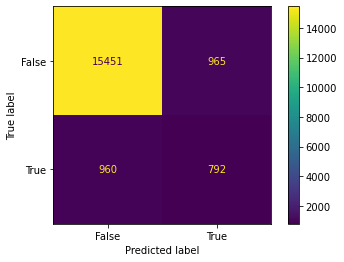

In [27]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

In [28]:
print("Decision Tree accuracy: %.2f" % accuracy_score(y_pred,y_test) )

Decision Tree accuracy: 0.89


### PCA analysis

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
pca.fit(X)

PCA()

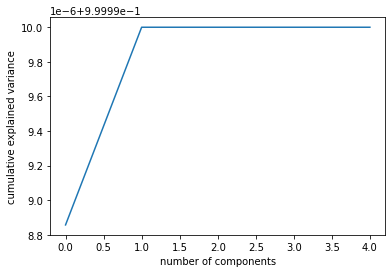

In [31]:

plt.plot(np.cumsum(pca.explained_variance_ratio_),label="4 components")

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');